In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

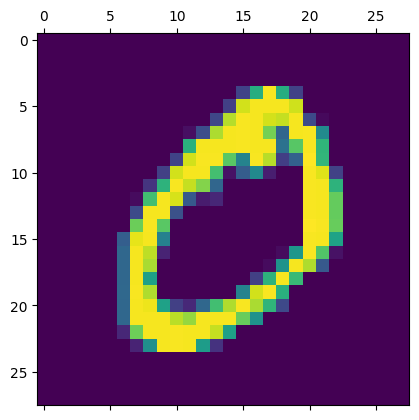

In [6]:
plt.matshow(x_train[1])

In [7]:
y_train[1]

0

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [9]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten, y_train,epochs=10)

NameError: name 'x_train_flatten' is not defined

In [11]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2652 - accuracy: 0.9267


[0.2651539742946625, 0.9266999959945679]

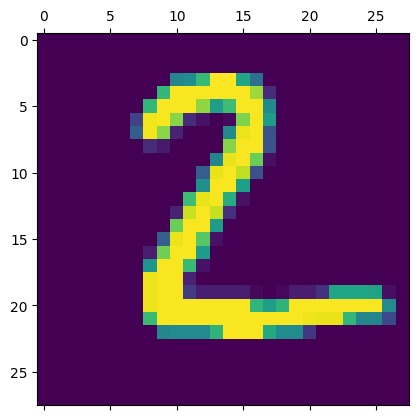

In [12]:
plt.matshow(x_test[1])

In [29]:
y_pred=model.predict(x_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [30]:
import numpy as np

In [31]:
y_pred[1]

array([3.0475363e-01, 9.2184590e-03, 9.9947041e-01, 2.1518771e-01,
       1.3910212e-11, 8.7578136e-01, 8.6242968e-01, 1.1420707e-15,
       9.4216719e-02, 3.1985525e-12], dtype=float32)

In [32]:
np.argmax(y_pred[1])

2

In [33]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [34]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

In [36]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    6,    4,    2,    1,    0],
       [   0, 1117,    3,    3,    0,    1,    3,    2,    6,    0],
       [   7,   12,  915,   18,    8,    3,   13,    9,   44,    3],
       [   2,    0,   16,  923,    1,   24,    2,    9,   27,    6],
       [   1,    1,    5,    2,  924,    0,    8,    4,   11,   26],
       [  10,    3,    1,   35,   11,  772,   13,    6,   35,    6],
       [  12,    3,    7,    2,    7,   12,  910,    1,    4,    0],
       [   1,    6,   26,    3,    8,    1,    0,  952,    4,   27],
       [   6,   11,    6,   16,    9,   18,    7,   12,  881,    8],
       [  11,    8,    1,    8,   34,    7,    0,   23,    8,  909]])>

In [37]:
import seaborn as sns

<AxesSubplot: >

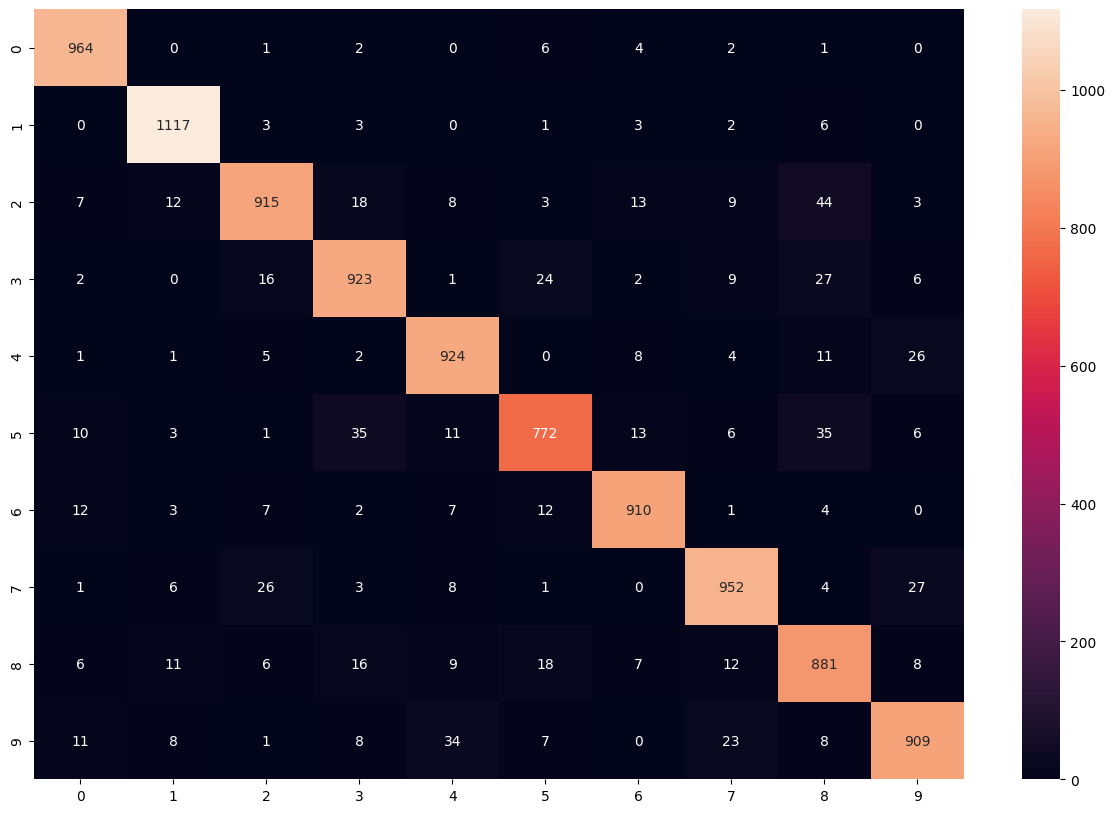

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt="d")

In [39]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2768 - accuracy: 0.9221
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1252 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0871 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0670 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0528 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0425 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0354 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0287 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - los

In [40]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0769 - accuracy: 0.9788


[0.0769299566745758, 0.9787999987602234]

In [41]:
y_pred=model.predict(x_test_flatten)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 3ms/step


In [42]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

<AxesSubplot: >

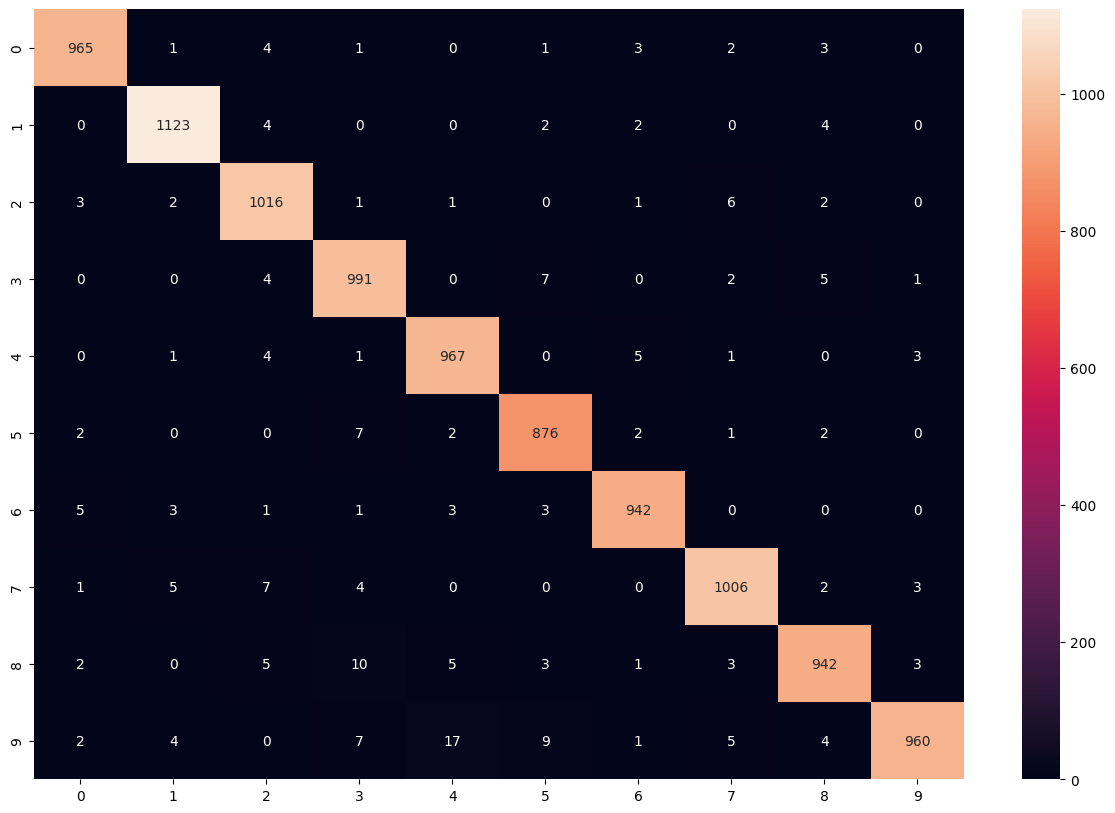

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt="d")

In [44]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6567 - accuracy: 0.8516
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4193 - accuracy: 0.9003
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3113 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2622 - accuracy: 0.9316
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2447 - accuracy: 0.9363
